In [1]:
#importing libraries
import pandas as pd
import matplotlib
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
import statsmodels
from statsmodels.stats import multitest
import statistics
from math import sqrt
from statsmodels.stats.power import TTestIndPower
import os.path
import glob
import fnmatch
import os
import shutil
import subprocess
import squarify
from mycolorpy import colorlist as mcp
import random

%matplotlib inline

def listdir(dirname, pattern="*"):
    return fnmatch.filter(os.listdir(dirname), pattern)

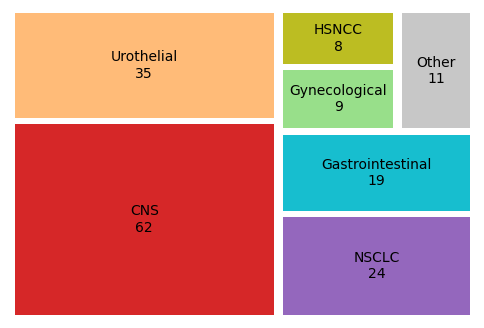

In [2]:
#visualizing mutations
mutations = pd.read_csv("mutation_count.csv", index_col = 0)
mutations_main = mutations.copy()
mutations_main = mutations_main.iloc[0:6]
mutations_main.loc["Other", "Mutation count"] = sum(mutations.iloc[6:13, 0])
mutations_main
mutations_minor = mutations.iloc[6:13]

label_list = []
for x in range(len(mutations_main.index)):
    label_list.append(str(mutations_main.index[x]) + "\n" + str(mutations_main.iloc[x, 0].astype(int)))

color_list = ['#d62728', '#ffbb78','#9467bd','#17becf','#98df8a','#bcbd22','#c7c7c7']
plt.figure(figsize=(6,4))
squarify.plot(mutations_main["Mutation count"], color = color_list, label = label_list, pad=2)
plt.axis('off')
plt.show()

(0.0, 100.0, 0.0, 100.0)

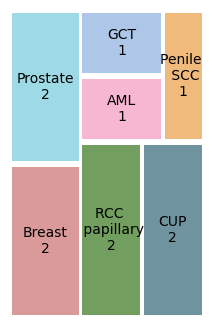

In [3]:
color_list_2 = ['#DA9A9A','#9edae5','#729F5F','#6F949F','#f7b6d2','#aec7e8', "#F0BA7C"]
mutations_minor.index = ['Breast', 'Prostate', 'RCC \n papillary', 'CUP', 'AML', 'GCT','Penile \n SCC']

label_list_2 = []
for x in range(len(mutations_minor.index)):
    label_list_2.append(str(mutations_minor.index[x]) + "\n" + str(mutations_minor.iloc[x, 0].astype(int)))

plt.figure(figsize=(2.5,4))

squarify.plot(mutations_minor["Mutation count"], color = color_list_2, label = label_list_2, pad=2)
plt.axis('off')



In [4]:
#making the VAF file
gene_name = ["BRCA1", "BRAF", "TP53", "FGFR2", "NRAS"]
patient_name = pd.read_csv("patient_labels.txt", sep = "\t")["names"]
deidentified_patient_name = pd.read_csv("deidentified_patientlabels.txt", sep = "\t")["names"]

BRCA1_vaf_df = pd.DataFrame(columns = ["Total_reads", "A_reads", "T_reads", "C_reads", "G_reads", "Deleted_reads"])
for x in patient_name:
    temp_holder = pd.read_csv("FGFR3fus/FGFR3fusion_DNA/{}/{}_BRCA1_VAF.txt".format(x,x), sep = "\t").apply(pd.to_numeric)
    BRCA1_vaf_df.loc[x, "A_reads"] = [item for item in temp_holder.columns if "A:" in item][0].split(":")[1]
    BRCA1_vaf_df.loc[x, "T_reads"] = [item for item in temp_holder.columns if "T:" in item][0].split(":")[1]
    BRCA1_vaf_df.loc[x, "C_reads"] = [item for item in temp_holder.columns if "C:" in item][0].split(":")[1]
    BRCA1_vaf_df.loc[x, "G_reads"] = [item for item in temp_holder.columns if "G:" in item][0].split(":")[1]
    for item in temp_holder.columns:
        if "-T:" in item:
            BRCA1_vaf_df.loc[x, "Deleted_reads"] = [item for item in temp_holder.columns if "-T:" in item][0].split(":")[1]
    BRCA1_vaf_df.loc[x, "Total_reads"] =temp_holder.columns[3]

BRCA1_vaf_df.to_csv("BRCA1_VAF_table.txt", sep = "\t", index = True, header = True)
BRCA1_vaf_df = BRCA1_vaf_df.fillna(0)

BRAF_vaf_df = pd.DataFrame(columns = ["Total_reads", "A_reads", "T_reads", "C_reads", "G_reads"])
for x in patient_name:
    temp_holder = pd.read_csv("FGFR3fus/FGFR3fusion_DNA/{}/{}_BRAF_VAF.txt".format(x,x), sep = "\t").apply(pd.to_numeric)
    BRAF_vaf_df.loc[x, "A_reads"] = [item for item in temp_holder.columns if "A:" in item][0].split(":")[1]
    BRAF_vaf_df.loc[x, "T_reads"] = [item for item in temp_holder.columns if "T:" in item][0].split(":")[1]
    BRAF_vaf_df.loc[x, "C_reads"] = [item for item in temp_holder.columns if "C:" in item][0].split(":")[1]
    BRAF_vaf_df.loc[x, "G_reads"] = [item for item in temp_holder.columns if "G:" in item][0].split(":")[1]
    BRAF_vaf_df.loc[x, "Total_reads"] =temp_holder.columns[3]

BRAF_vaf_df.to_csv("BRAF_VAF_table.txt", sep = "\t", index = True, header = True)

TP53_vaf_df = pd.DataFrame(columns = ["Total_reads", "A_reads", "T_reads", "C_reads", "G_reads"])
for x in patient_name:
    temp_holder = pd.read_csv("FGFR3fus/FGFR3fusion_DNA/{}/{}_TP53_VAF.txt".format(x,x), sep = "\t").apply(pd.to_numeric)
    TP53_vaf_df.loc[x, "A_reads"] = [item for item in temp_holder.columns if "A:" in item][0].split(":")[1]
    TP53_vaf_df.loc[x, "T_reads"] = [item for item in temp_holder.columns if "T:" in item][0].split(":")[1]
    TP53_vaf_df.loc[x, "C_reads"] = [item for item in temp_holder.columns if "C:" in item][0].split(":")[1]
    TP53_vaf_df.loc[x, "G_reads"] = [item for item in temp_holder.columns if "G:" in item][0].split(":")[1]
    TP53_vaf_df.loc[x, "Total_reads"] =temp_holder.columns[3]

TP53_vaf_df.to_csv("TP53_VAF_table.txt", sep = "\t", index = True, header = True)

FGFR2_vaf_df = pd.DataFrame(columns = ["Total_reads", "A_reads", "T_reads", "C_reads", "G_reads"])
for x in patient_name:
    temp_holder = pd.read_csv("FGFR3fus/FGFR3fusion_DNA/{}/{}_FGFR2_VAF.txt".format(x,x), sep = "\t").apply(pd.to_numeric)
    FGFR2_vaf_df.loc[x, "A_reads"] = [item for item in temp_holder.columns if "A:" in item][0].split(":")[1]
    FGFR2_vaf_df.loc[x, "T_reads"] = [item for item in temp_holder.columns if "T:" in item][0].split(":")[1]
    FGFR2_vaf_df.loc[x, "C_reads"] = [item for item in temp_holder.columns if "C:" in item][0].split(":")[1]
    FGFR2_vaf_df.loc[x, "G_reads"] = [item for item in temp_holder.columns if "G:" in item][0].split(":")[1]
    FGFR2_vaf_df.loc[x, "Total_reads"] =temp_holder.columns[3]

FGFR2_vaf_df.to_csv("FGFR2_VAF_table.txt", sep = "\t", index = True, header = True)

NRAS_vaf_df = pd.DataFrame(columns = ["Total_reads", "A_reads", "T_reads", "C_reads", "G_reads"])
for x in patient_name:
    temp_holder = pd.read_csv("FGFR3fus/FGFR3fusion_DNA/{}/{}_NRAS_VAF.txt".format(x,x), sep = "\t").apply(pd.to_numeric)
    NRAS_vaf_df.loc[x, "A_reads"] = [item for item in temp_holder.columns if "A:" in item][0].split(":")[1]
    NRAS_vaf_df.loc[x, "T_reads"] = [item for item in temp_holder.columns if "T:" in item][0].split(":")[1]
    NRAS_vaf_df.loc[x, "C_reads"] = [item for item in temp_holder.columns if "C:" in item][0].split(":")[1]
    NRAS_vaf_df.loc[x, "G_reads"] = [item for item in temp_holder.columns if "G:" in item][0].split(":")[1]
    NRAS_vaf_df.loc[x, "Total_reads"] =temp_holder.columns[3]

NRAS_vaf_df.to_csv("NRAS_VAF_table.txt", sep = "\t", index = True, header = True)

fusion_vaf_df = pd.DataFrame(columns = ["Total_reads"])
#fusion denominator
for x in patient_name:
    temp_holder = pd.read_csv("FGFR3fus/FGFR3fusion_DNA/{}/{}_fusion_denominator_VAF.txt".format(x,x), sep = "\t").apply(pd.to_numeric)
    fusion_vaf_df.loc[x, "Total_reads"] =temp_holder.columns[3]
    
temp_holder_2 = pd.read_csv("FGFR3fus/FGFR3fusion_DNA/fusion_count.txt", sep = "\t", index_col = 0)["fusion_count"]
fusion_vaf_df["fusion_reads"] =temp_holder_2


In [5]:
for x in BRCA1_vaf_df.index:
    BRCA1_vaf_df.loc[x, "BRCA1_deletion_VAF%"] = "{}/{}({}%)".format(BRCA1_vaf_df.loc[x, "Deleted_reads"], BRCA1_vaf_df.loc[x, "Total_reads"], round((100 * int(BRCA1_vaf_df.loc[x, "Deleted_reads"]))/int(BRCA1_vaf_df.loc[x, "Total_reads"]), 2))
    BRAF_vaf_df.loc[x, "BRAF_CtoG_VAF%"] = "{}/{}({}%)".format(BRAF_vaf_df.loc[x, "G_reads"], BRAF_vaf_df.loc[x, "Total_reads"], round((100 * int(BRAF_vaf_df.loc[x, "G_reads"]))/int(BRAF_vaf_df.loc[x, "Total_reads"]), 2))
    TP53_vaf_df.loc[x, "TP53_CtoT_VAF%"] = "{}/{}({}%)".format(TP53_vaf_df.loc[x, "T_reads"], TP53_vaf_df.loc[x, "Total_reads"], round((100 * int(TP53_vaf_df.loc[x, "T_reads"]))/int(TP53_vaf_df.loc[x, "Total_reads"]), 2))
    FGFR2_vaf_df.loc[x, "FGFR2_AtoC_VAF%"] = "{}/{}({}%)".format(FGFR2_vaf_df.loc[x, "C_reads"], FGFR2_vaf_df.loc[x, "Total_reads"], round((100 * int(FGFR2_vaf_df.loc[x, "C_reads"]))/int(FGFR2_vaf_df.loc[x, "Total_reads"]), 2))
    NRAS_vaf_df.loc[x, "NRAS_TtoA_VAF%"] = "{}/{}({}%)".format(NRAS_vaf_df.loc[x, "A_reads"], NRAS_vaf_df.loc[x, "Total_reads"], round((100 * int(NRAS_vaf_df.loc[x, "A_reads"]))/int(NRAS_vaf_df.loc[x, "Total_reads"]), 2))
    fusion_vaf_df.loc[x, "fusion_VAF"] = "{}/{}".format(fusion_vaf_df.loc[x, "fusion_reads"], fusion_vaf_df.loc[x, "Total_reads"])

    

In [6]:
full_VAF_df = pd.concat([TP53_vaf_df["TP53_CtoT_VAF%"], BRCA1_vaf_df["BRCA1_deletion_VAF%"], fusion_vaf_df["fusion_VAF"], BRAF_vaf_df["BRAF_CtoG_VAF%"], FGFR2_vaf_df["FGFR2_AtoC_VAF%"], NRAS_vaf_df["NRAS_TtoA_VAF%"]], axis = 1)
full_VAF_df.index = deidentified_patient_name
full_VAF_df.to_csv("full_VAF_table.txt", sep = "\t", index = True, header = True)
full_VAF_df


,TP53_CtoT_VAF%,BRCA1_deletion_VAF%,fusion_VAF,BRAF_CtoG_VAF%,FGFR2_AtoC_VAF%,NRAS_TtoA_VAF%
names,,,,,,
QH-BCM-DEFE,9/3767(0.24%),0/3549(0.0%),0/3508,0/2961(0.0%),1/3492(0.03%),2/2514(0.08%)
QH-BCM-ZMXY,2/5137(0.04%),2/5023(0.04%),0/5014,0/4418(0.0%),0/4609(0.0%),0/3682(0.0%)
QH-BCM-KNCB,7/5707(0.12%),18/6235(0.29%),0/6159,0/5505(0.0%),0/5772(0.0%),2/4371(0.05%)
QH-BCM-T5E9,19/7723(0.25%),33/7571(0.44%),0/7252,0/7066(0.0%),5/7804(0.06%),5/5542(0.09%)
QH-BCM-BBBQ,264/4718(5.6%),346/4796(7.21%),43/4524,0/4253(0.0%),0/4646(0.0%),2/3483(0.06%)
QH-BCM-63NZ,983/3625(27.12%),1323/4015(32.95%),215/4618,2/4508(0.04%),1/3769(0.03%),0/3332(0.0%)
QH-BCM-2TE8,2044/4762(42.92%),2539/5362(47.35%),429/6089,0/7030(0.0%),1/5141(0.02%),1/5092(0.02%)
QH-BCM-3YNJ,11/4968(0.22%),1/5307(0.02%),0/4905,0/4611(0.0%),1/5024(0.02%),0/3627(0.0%)
QH-BCM-QW33,11/5276(0.21%),0/5876(0.0%),0/5751,0/5241(0.0%),1/5545(0.02%),0/4319(0.0%)
